### Animesh Deb
### Task 3 - Perform 'Exploratory Data Analysis (EDA)'  on dataset 'Global Terrorism'
### Objective - 
#### 1. As a Security/Defence analyst, try to find out the hot zone of terrorism
#### 2. What all Security issues and insights you can derive by EDA ?

#### Importing the required libraries and packages

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import chardet
with open("globalterrorismdb_0718dist.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
pd.set_option("display.max_rows", None)

#### Importing and reading the dataset

In [4]:

df=pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


In [5]:
#checking the first 5 rows of the dataset
pd.set_option("display.max_columns",None)
df.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [6]:
# Checking the dataset information

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   iyear               181691 non-null  int64  
 2   imonth              181691 non-null  int64  
 3   iday                181691 non-null  int64  
 4   approxdate          9239 non-null    object 
 5   extended            181691 non-null  int64  
 6   resolution          2220 non-null    object 
 7   country             181691 non-null  int64  
 8   country_txt         181691 non-null  object 
 9   region              181691 non-null  int64  
 10  region_txt          181691 non-null  object 
 11  provstate           181270 non-null  object 
 12  city                181257 non-null  object 
 13  latitude            177135 non-null  float64
 14  longitude           177134 non-null  float64
 15  specificity         181685 non-nu

In [7]:
# Checking the shape of the dataset

df.shape

(181691, 135)

In [8]:
# Null value percentage for each variable

nullvalues_analysis =  (pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2), columns = ['NullValue%Age'])).reset_index()
nullvalues_analysis.rename(columns = {'index':'Variable'}, inplace=True)

In [9]:
nullvalues_analysis

Variable  NullValue%Age
0               eventid           0.00
1                 iyear           0.00
2                imonth           0.00
3                  iday           0.00
4            approxdate          94.91
5              extended           0.00
6            resolution          98.78
7               country           0.00
8           country_txt           0.00
9                region           0.00
10           region_txt           0.00
11            provstate           0.23
12                 city           0.24
13             latitude           2.51
14            longitude           2.51
15          specificity           0.00
16             vicinity           0.00
17             location          69.46
18              summary          36.40
19                crit1           0.00
20                crit2           0.00
21                crit3           0.00
22            doubtterr           0.00
23          alternative          84.03
24      alternative_txt          84.03
25             multiple           0.00
26              success           0.00
27              suicide           0.00
28          attacktype1           0.00
29      attacktype1_txt           0.00
30          attacktype2          96.52
31      attacktype2_txt          96.52
32          attacktype3          99.76
33      attacktype3_txt          99.76
34            targtype1           0.00
35        targtype1_txt           0.00
36         targsubtype1           5.71
37     targsubtype1_txt           5.71
38                corp1          23.42
39              target1           0.35
40              natlty1           0.86
41          natlty1_txt           0.86
42            targtype2          93.87
43        targtype2_txt          93.87
44         targsubtype2          94.12
45     targsubtype2_txt          94.12
46                corp2          94.43
47              target2          93.93
48              natlty2          94.04
49          natlty2_txt          94.04
50            targtype3          99.35
51        targtype3_txt          99.35
52         targsubtype3          99.40
53     targsubtype3_txt          99.40
54                corp3          99.44
55              target3          99.35
56              natlty3          99.37
57          natlty3_txt          99.37
58                gname           0.00
59             gsubname          96.76
60               gname2          98.89
61            gsubname2          99.91
62               gname3          99.82
63            gsubname3          99.99
64               motive          72.17
65          guncertain1           0.21
66          guncertain2          98.92
67          guncertain3          99.82
68           individual           0.00
69               nperps          39.14
70             nperpcap          38.25
71              claimed          36.39
72            claimmode          89.50
73        claimmode_txt          89.50
74               claim2          98.96
75           claimmode2          99.66
76       claimmode2_txt          99.66
77               claim3          99.82
78           claimmode3          99.93
79       claimmode3_txt          99.93
80            compclaim          97.34
81            weaptype1           0.00
82        weaptype1_txt           0.00
83         weapsubtype1          11.43
84     weapsubtype1_txt          11.43
85            weaptype2          92.78
86        weaptype2_txt          92.78
87         weapsubtype2          93.65
88     weapsubtype2_txt          93.65
89            weaptype3          98.97
90        weaptype3_txt          98.97
91         weapsubtype3          99.07
92     weapsubtype3_txt          99.07
93            weaptype4          99.96
94        weaptype4_txt          99.96
95         weapsubtype4          99.96
96     weapsubtype4_txt          99.96
97           weapdetail          37.24
98                nkill           5.68
99              nkillus          35.47
100            nkillter          36.85
101              nwound           8.9

In [10]:
# Variables with more than 60% null values are considered as insignificant and do not carry much information. This is also verified
# as per the definition of the these variables. These insignificant variables are excluded

insignificant_var = list(nullvalues_analysis[nullvalues_analysis['NullValue%Age'] >60]['Variable'])
insignificant_var



['approxdate',
 'resolution',
 'location',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'propextent',
 'propextent_txt',
 'propvalue',
 'propcomment',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 

In [11]:
df1=df.drop(insignificant_var, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 60 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [12]:
# Checking for any duplicate valies
df1.duplicated().sum()

0

In [13]:
# Viewing the shape
df1.shape


(181691, 60)

In [14]:
# Checking the null values again
round((df1.isnull().sum()/df1.shape[0])*100,2)
    

eventid              0.00
iyear                0.00
imonth               0.00
iday                 0.00
extended             0.00
country              0.00
country_txt          0.00
region               0.00
region_txt           0.00
provstate            0.23
city                 0.24
latitude             2.51
longitude            2.51
specificity          0.00
vicinity             0.00
summary             36.40
crit1                0.00
crit2                0.00
crit3                0.00
doubtterr            0.00
multiple             0.00
success              0.00
suicide              0.00
attacktype1          0.00
attacktype1_txt      0.00
targtype1            0.00
targtype1_txt        0.00
targsubtype1         5.71
targsubtype1_txt     5.71
corp1               23.42
target1              0.35
natlty1              0.86
natlty1_txt          0.86
gname                0.00
guncertain1          0.21
individual           0.00
nperps              39.14
nperpcap            38.25
claimed     

In [15]:
# Excluding the numeric variable which are codes and whose text description variable is available

df1.head()

eventid  iyear  imonth  iday  extended  country         country_txt  \
0  197000000001   1970       7     2         0       58  Dominican Republic   
1  197000000002   1970       0     0         0      130              Mexico   
2  197001000001   1970       1     0         0      160         Philippines   
3  197001000002   1970       1     0         0       78              Greece   
4  197001000003   1970       1     0         0      101               Japan   

   region                   region_txt provstate           city   latitude  \
0       2  Central America & Caribbean       NaN  Santo Domingo  18.456792   
1       1                North America   Federal    Mexico city  19.371887   
2       5               Southeast Asia    Tarlac        Unknown  15.478598   
3       8               Western Europe    Attica         Athens  37.997490   
4       4                    East Asia   Fukouka        Fukouka  33.580412   

    longitude  specificity  vicinity summary  crit1  crit2  crit3  doubtterr  \
0  -69.951164          1.0         0     NaN      1      1      1        0.0   
1  -99.086624          1.0         0     NaN      1      1      1        0.0   
2  120.599741          4.0         0     NaN      1      1      1        0.0   
3   23.762728          1.0         0     NaN      1      1      1        0.0   
4  130.396361          1.0         0     NaN      1      1      1       -9.0   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   targtype1                targtype1_txt  targsubtype1  \
0         14  Private Citizens & Property          68.0   
1          7      Government (Diplomatic)          45.0   
2         10          Journalists & Media          54.0   
3          7      Government (Diplomatic)          46.0   
4          7      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt                               gname  guncertain1  \
0  Dominican Republic                              MANO-D          0.0   
1             Belgium  23rd of September Communist League          0.0   
2       United States                             Unknown          0.0   
3       United States                             Unknown          0.0   
4       United States                             Unknown          0.0   

   individual  nperps  nperpcap  claimed  weaptype1 weaptype1_txt  \
0           0     NaN       NaN      NaN         13       Unknown   
1           0     7.0       NaN      NaN         13       Unknown   
2           0     NaN       NaN      NaN         13       Unknown   
3           0     NaN       NaN      NaN          6    Explosives   
4           0     NaN       NaN      NaN          8    Incendiary   

   weapsubtype1        weapsubtype1_txt  weapdetail  nkill  nkillus  nkillter  \
0           NaN                     NaN         NaN    1.0      NaN     

In [16]:
df1['gname'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [17]:
df1 = df1.loc[:,['iyear','imonth','country_txt','region_txt','city','crit1','success','suicide','attacktype1_txt','targtype1_txt','targsubtype1_txt','gname','corp1','target1','weaptype1_txt','weapsubtype1_txt','nkill','nwound','ransom','dbsource']]

In [18]:
# Dataframe selected with meaningful variables for the EDA
df1.head()

iyear  imonth         country_txt                   region_txt  \
0   1970       7  Dominican Republic  Central America & Caribbean   
1   1970       0              Mexico                North America   
2   1970       1         Philippines               Southeast Asia   
3   1970       1              Greece               Western Europe   
4   1970       1               Japan                    East Asia   

            city  crit1  success  suicide                 attacktype1_txt  \
0  Santo Domingo      1        1        0                   Assassination   
1    Mexico city      1        1        0     Hostage Taking (Kidnapping)   
2        Unknown      1        1        0                   Assassination   
3         Athens      1        1        0               Bombing/Explosion   
4        Fukouka      1        1        0  Facility/Infrastructure Attack   

                 targtype1_txt  \
0  Private Citizens & Property   
1      Government (Diplomatic)   
2          Journalists & Media   
3      Government (Diplomatic)   
4      Government (Diplomatic)   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                                gname                        corp1  \
0                              MANO-D                          NaN   
1  23rd of September Communist League  Belgian Ambassador Daughter   
2                             Unknown             Voice of America   
3                             Unknown                          NaN   
4                             Unknown                          NaN   

                   target1 weaptype1_txt        weapsubtype1_txt  nkill  \
0             Julio Guzman       Unknown                     NaN    1.0   
1  Nadine Chaval, daughter       Unknown                     NaN    0.0   
2                 Employee       Unknown                     NaN    1.0   
3             U.S. Embassy    Explosives  Unknown Explosive Type    NaN   
4           U.S. Consulate    Incendiary                     NaN    NaN   

   nwound  ransom dbsource  
0     0.0     0.0     PGIS  
1     0.0     1.0     PGIS  
2     0.0     0.0     PGIS  
3     NaN     0.0     PGIS  
4     NaN     0.0     PGIS

In [19]:
df1.isnull().sum()

iyear                    0
imonth                   0
country_txt              0
region_txt               0
city                   434
crit1                    0
success                  0
suicide                  0
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
gname                    0
corp1                42550
target1                636
weaptype1_txt            0
weapsubtype1_txt     20768
nkill                10313
nwound               16311
ransom              104310
dbsource                 0
dtype: int64

In [20]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

iyear                0.00
imonth               0.00
country_txt          0.00
region_txt           0.00
city                 0.24
crit1                0.00
success              0.00
suicide              0.00
attacktype1_txt      0.00
targtype1_txt        0.00
targsubtype1_txt     5.71
gname                0.00
corp1               23.42
target1              0.35
weaptype1_txt        0.00
weapsubtype1_txt    11.43
nkill                5.68
nwound               8.98
ransom              57.41
dbsource             0.00
dtype: float64


#### Data Visualisation - Univariate Analysis

In [21]:
df1['crit1'].unique()

array([1, 0], dtype=int64)

In [22]:
df1['success'].unique()

array([1, 0], dtype=int64)

In [23]:
df1['suicide'].unique()

array([0, 1], dtype=int64)

In [24]:
df1['ransom'].value_counts()

 0.0    74684
-9.0     1398
 1.0     1299
Name: ransom, dtype: int64

In [25]:
# Replacing the binary values of 0 and 1 with Yes and No for few of the variables

In [26]:
df1['crit1'].replace(to_replace=1, value = 'Yes',inplace=True)
df1['crit1'].replace(to_replace=0, value = 'No',inplace=True)
df1['crit1'] =df1['crit1'].astype('object')
df1['crit1'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df1['success'].replace(to_replace=1, value = 'Yes',inplace=True)
df1['success'].replace(to_replace=0, value = 'No',inplace=True)
df1['success'] =df1['success'].astype('object')
df1['success'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df1['suicide'].replace(to_replace=1, value = 'Yes',inplace=True)
df1['suicide'].replace(to_replace=0, value = 'No',inplace=True)
df1['suicide'] =df1['suicide'].astype('object')
df1['suicide'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df1['ransom'].replace(to_replace=1, value = 'Yes',inplace=True)
df1['ransom'].replace(to_replace=0, value = 'No',inplace=True)
df1['ransom'].replace(to_replace=-9.0, value = 'Yes',inplace=True)
df1['ransom'] =df1['ransom'].astype('object')
df1['ransom'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
df1['ransom'].isnull().sum()

104310

In [31]:
df1['iyear'] = pd.to_datetime(df1['iyear'], format='%Y')


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   iyear             181691 non-null  datetime64[ns]
 1   imonth            181691 non-null  int64         
 2   country_txt       181691 non-null  object        
 3   region_txt        181691 non-null  object        
 4   city              181257 non-null  object        
 5   crit1             181691 non-null  object        
 6   success           181691 non-null  object        
 7   suicide           181691 non-null  object        
 8   attacktype1_txt   181691 non-null  object        
 9   targtype1_txt     181691 non-null  object        
 10  targsubtype1_txt  171318 non-null  object        
 11  gname             181691 non-null  object        
 12  corp1             139141 non-null  object        
 13  target1           181055 non-null  object        
 14  weap

In [33]:
df1.head()

iyear  imonth         country_txt                   region_txt  \
0 1970-01-01       7  Dominican Republic  Central America & Caribbean   
1 1970-01-01       0              Mexico                North America   
2 1970-01-01       1         Philippines               Southeast Asia   
3 1970-01-01       1              Greece               Western Europe   
4 1970-01-01       1               Japan                    East Asia   

            city crit1 success suicide                 attacktype1_txt  \
0  Santo Domingo   Yes     Yes      No                   Assassination   
1    Mexico city   Yes     Yes      No     Hostage Taking (Kidnapping)   
2        Unknown   Yes     Yes      No                   Assassination   
3         Athens   Yes     Yes      No               Bombing/Explosion   
4        Fukouka   Yes     Yes      No  Facility/Infrastructure Attack   

                 targtype1_txt  \
0  Private Citizens & Property   
1      Government (Diplomatic)   
2          Journalists & Media   
3      Government (Diplomatic)   
4      Government (Diplomatic)   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                                gname                        corp1  \
0                              MANO-D                          NaN   
1  23rd of September Communist League  Belgian Ambassador Daughter   
2                             Unknown             Voice of America   
3                             Unknown                          NaN   
4                             Unknown                          NaN   

                   target1 weaptype1_txt        weapsubtype1_txt  nkill  \
0             Julio Guzman       Unknown                     NaN    1.0   
1  Nadine Chaval, daughter       Unknown                     NaN    0.0   
2                 Employee       Unknown                     NaN    1.0   
3             U.S. Embassy    Explosives  Unknown Explosive Type    NaN   
4           U.S. Consulate    Incendiary                     NaN    NaN   

   nwound ransom dbsource  
0     0.0     No     PGIS  
1     0.0    Yes     PGIS  
2     0.0     No     PGIS  
3     NaN     No     PGIS  
4     NaN     No     PGIS

<AxesSubplot:>

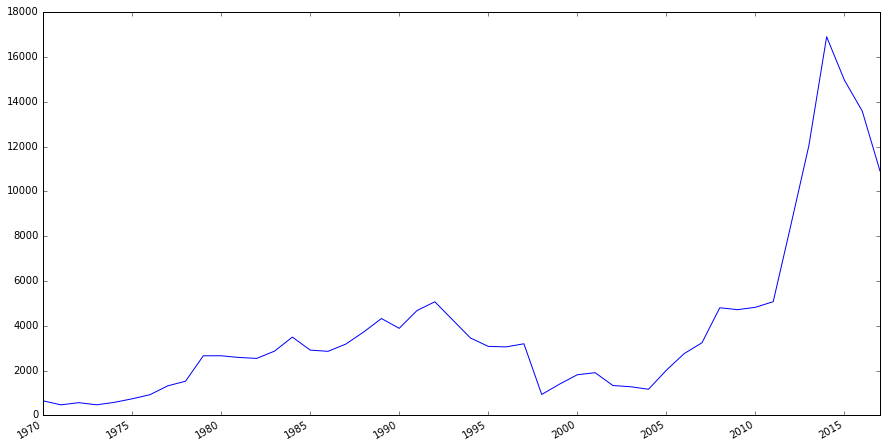

In [34]:
# Plotting year wise count of terrorist attacks

df1['iyear'].value_counts().plot(figsize=(15,8))

In [35]:
# It seems the cases of Terrorist attacks increased exponentially after 2008

In [37]:
# Imputing the null values of categorical variable with mode and numeric variables with mean

In [41]:
cat = list(df1.dtypes[df1.dtypes == 'object'].index) # Separating out the categorical variables
num = list(df1.dtypes[df1.dtypes == 'float64'].index) # Separating out the numerical variables

In [41]:
num

['nkill', 'nwound']

In [47]:
cat

['country_txt',
 'region_txt',
 'city',
 'crit1',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'gname',
 'corp1',
 'target1',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'ransom',
 'dbsource']

In [59]:
# imputing categorical variable using mode

for i in cat:
    mode = df1[i].mode()[0]
    df1[i].fillna(value = mode, inplace=True)
    


In [60]:
df1.isnull().sum()

iyear                   0
imonth                  0
country_txt             0
region_txt              0
city                    0
crit1                   0
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
targsubtype1_txt        0
gname                   0
corp1                   0
target1                 0
weaptype1_txt           0
weapsubtype1_txt        0
nkill               10313
nwound              16311
ransom                  0
dbsource                0
dtype: int64

In [61]:
# Filling null values of numeric variable

df1['nkill'].fillna(value=df1['nkill'].mean(), inplace=True)
df1['nwound'].fillna(value=df1['nwound'].mean(), inplace=True)

In [62]:
df1.isnull().sum()

iyear               0
imonth              0
country_txt         0
region_txt          0
city                0
crit1               0
success             0
suicide             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
gname               0
corp1               0
target1             0
weaptype1_txt       0
weapsubtype1_txt    0
nkill               0
nwound              0
ransom              0
dbsource            0
dtype: int64

#### Univariate Analysis

<AxesSubplot:xlabel='nkill', ylabel='Density'>

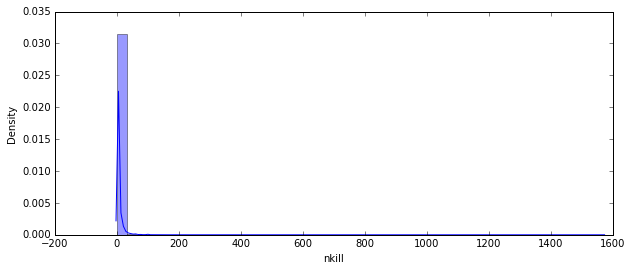

In [71]:
plt.figure(figsize = (10,4))
sns.distplot(df1['nkill'])

<AxesSubplot:xlabel='nkill'>

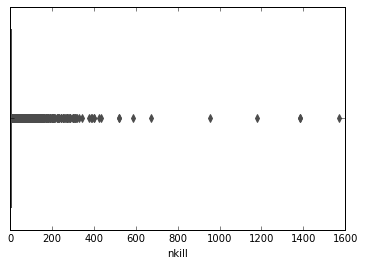

In [66]:
sns.boxplot(df1['nkill'])

In [67]:
df1.describe()

imonth          nkill         nwound
count  181691.000000  181691.000000  181691.000000
mean        6.467277       2.403272       3.167668
std         3.388303      11.213277      34.297796
min         0.000000       0.000000       0.000000
25%         4.000000       0.000000       0.000000
50%         6.000000       1.000000       0.000000
75%         9.000000       2.000000       3.000000
max        12.000000    1570.000000    8191.000000

In [208]:
df1[df1['nkill']>1500].head()

iyear  imonth country_txt                  region_txt    city  \
133518 2014-01-01       6        Iraq  Middle East & North Africa  Tikrit   

       crit1 success suicide              attacktype1_txt targtype1_txt  \
133518   Yes     Yes      No  Hostage Taking (Kidnapping)      Military   

                                         targsubtype1_txt  \
133518  Military Personnel (soldiers, troops, officers...   

                                              gname               corp1  \
133518  Islamic State of Iraq and the Levant (ISIL)  Iraqi Armed Forces   

         target1 weaptype1_txt  weapsubtype1_txt   nkill    nwound ransom  \
133518  Soldiers      Firearms  Unknown Gun Type  1570.0  3.167668     No   

                        dbsource  
133518  START Primary Collection

In [ ]:
# Max killed in a particular terrorist attach is 1570

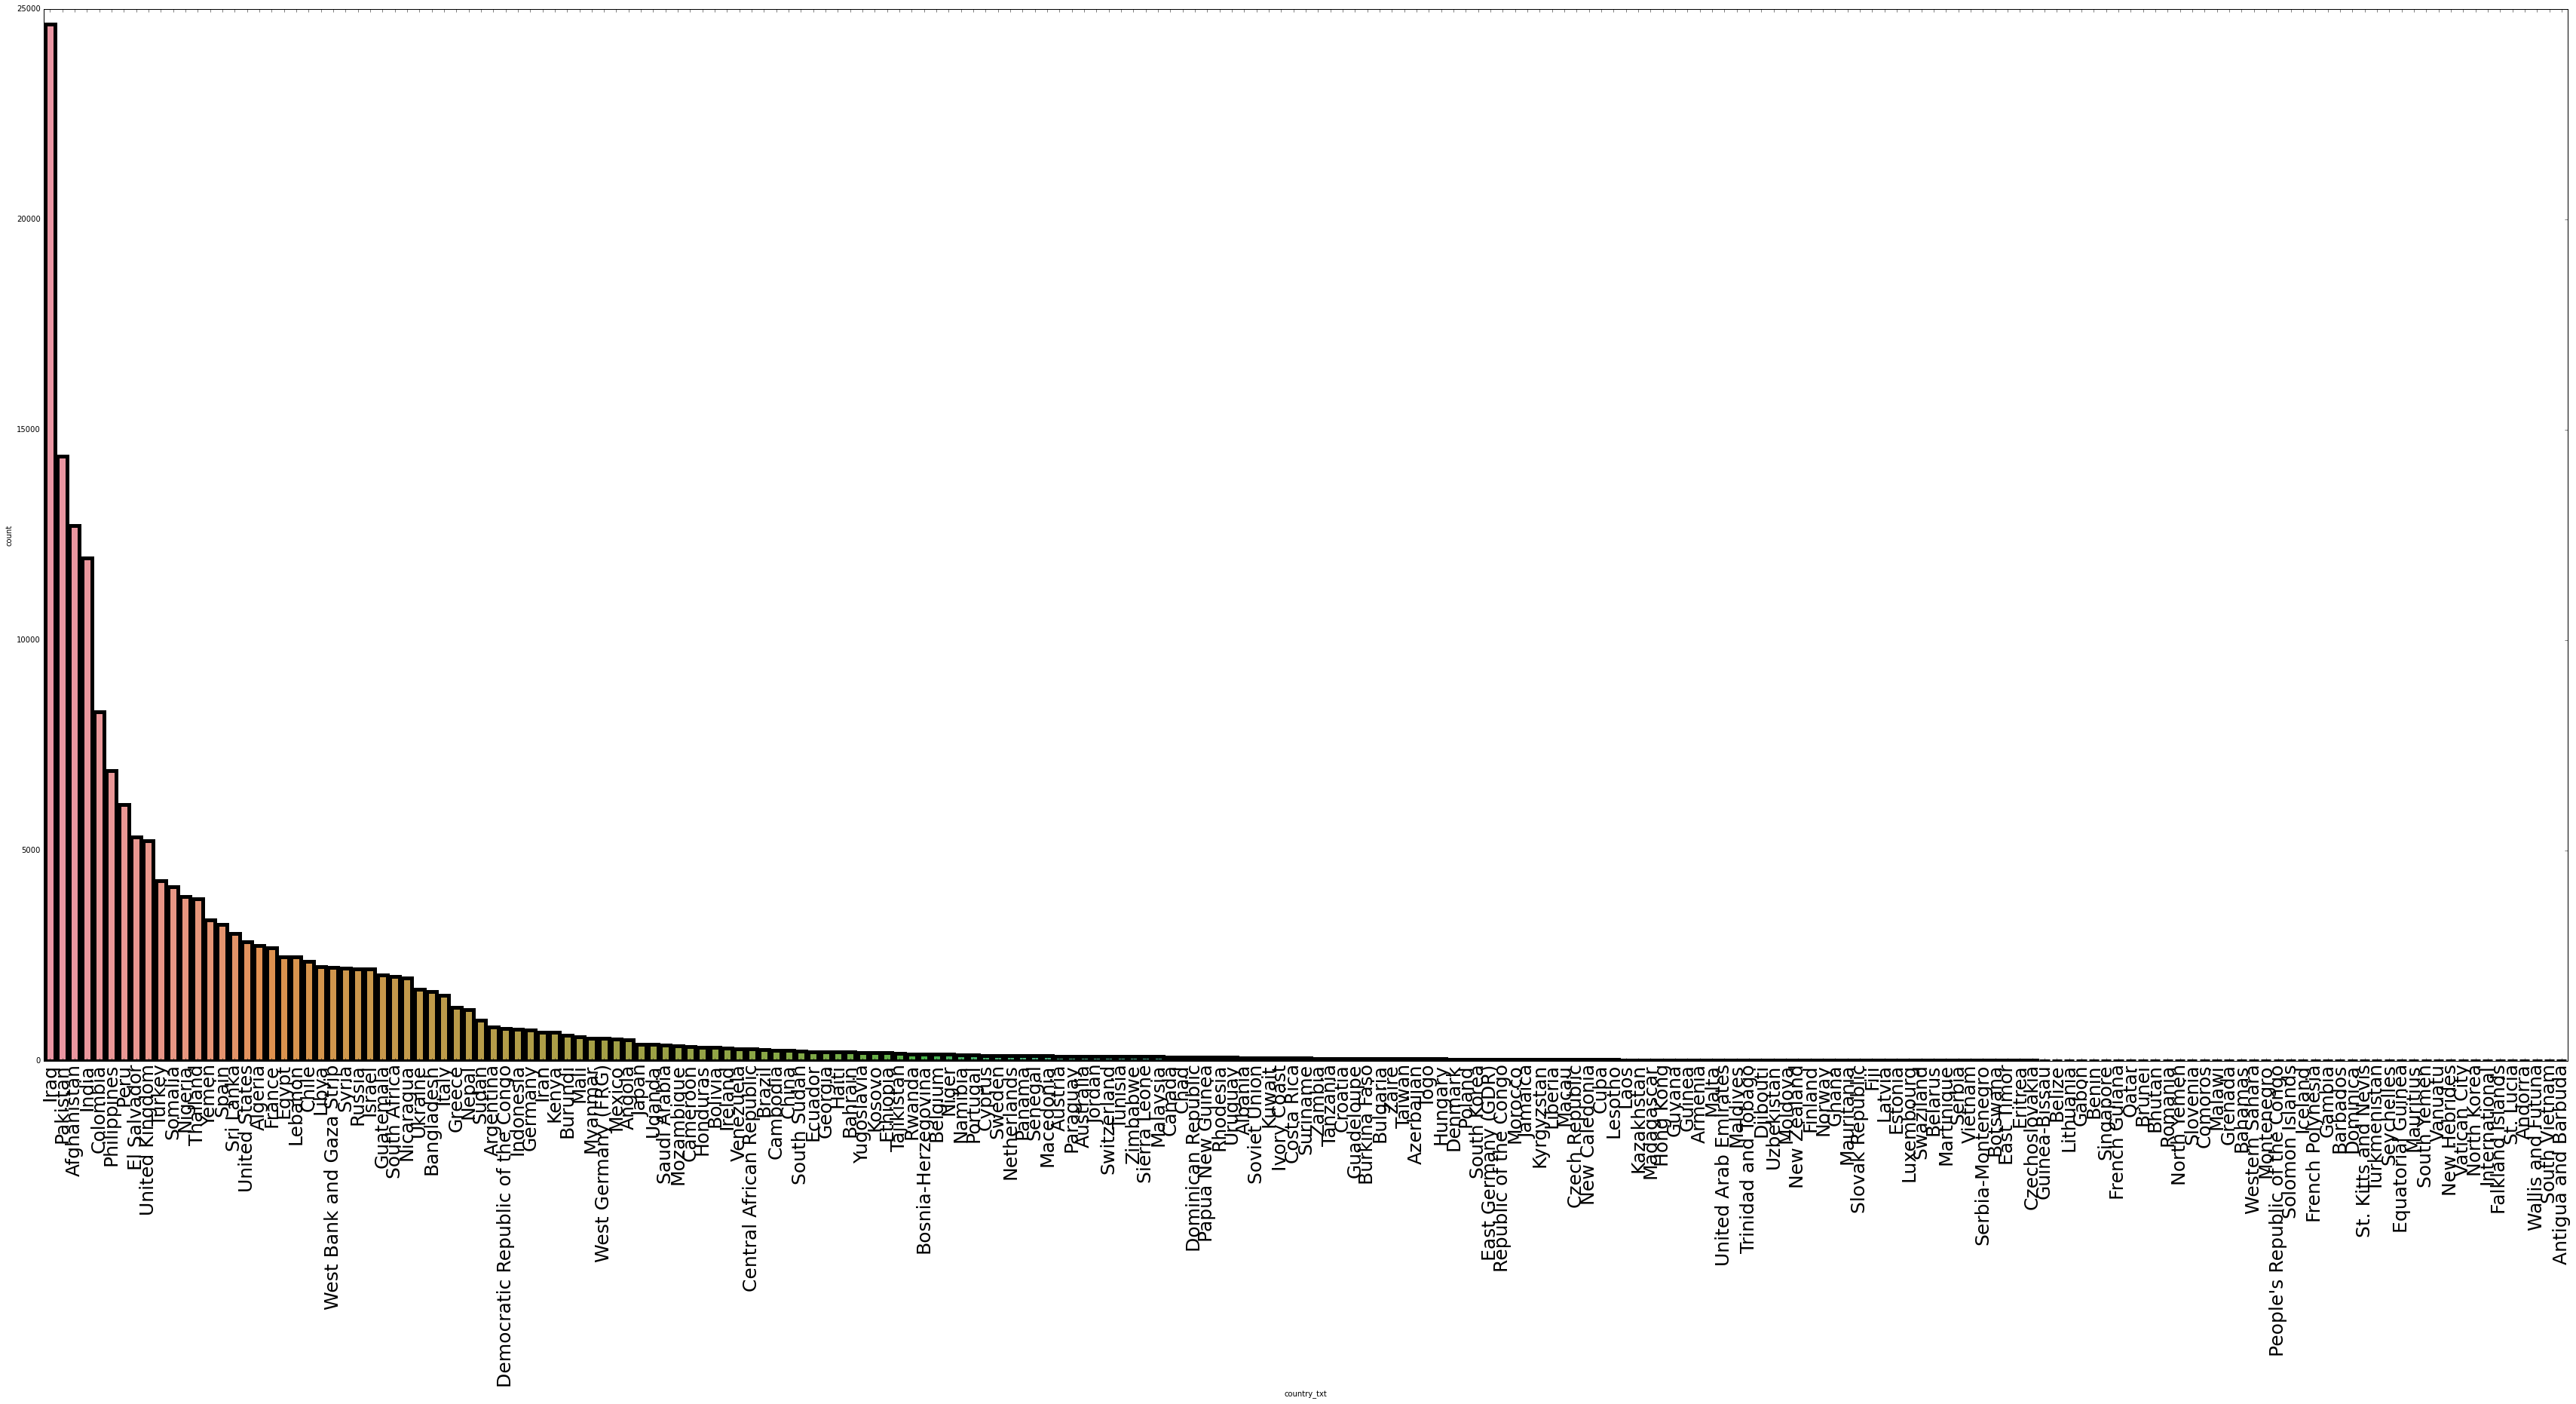

In [98]:
# Univariate analysis of the Categorical variable
fig=plt.figure(figsize=(60,25))
sns.countplot(df1['country_txt'],linewidth=5, order = df1['country_txt'].value_counts().index)
plt.xticks(fontsize = 25, rotation=90)
    
plt.show()

<AxesSubplot:>

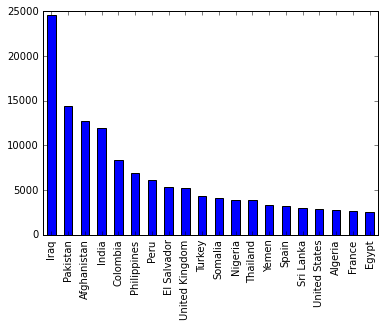

In [94]:
# Top 20 affected countries by terrorism

df1['country_txt'].value_counts().head(20).plot(kind = 'bar')

In [210]:
df1['country_txt'].value_counts(normalize=True).head(5)

Iraq           0.135593
Pakistan       0.079079
Afghanistan    0.070070
India          0.065826
Colombia       0.045715
Name: country_txt, dtype: float64

In [106]:
df1['region_txt'].value_counts().index

Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia',
       'Central America & Caribbean', 'Eastern Europe', 'North America',
       'East Asia', 'Central Asia', 'Australasia & Oceania'],
      dtype='object')

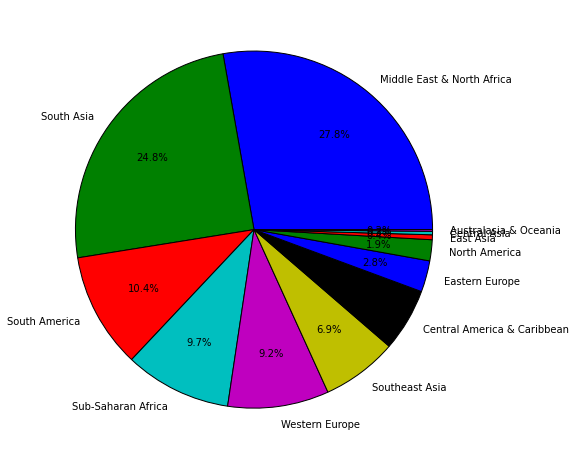

In [123]:
# Most affected region

plt.figure(figsize=(10,8))
plt.pie(df1['region_txt'].value_counts().values, labels=df1['region_txt'].value_counts().index,pctdistance=0.7, rotatelabels=False, labeldistance=1.1, autopct='%1.1f%%')
plt.show()

In [ ]:
# The top afffected regions are Middle East and North Africa, South Asia and South America

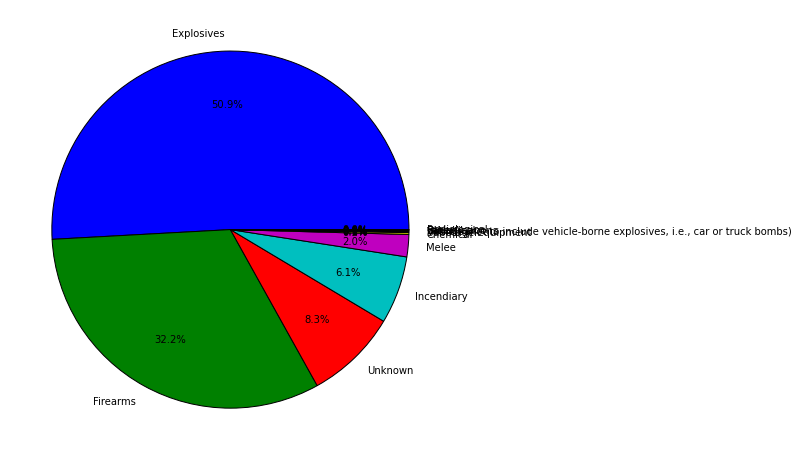

In [127]:
# Most used Weapons
plt.figure(figsize=(10,8))
plt.pie(df1['weaptype1_txt'].value_counts().values, labels=df1['weaptype1_txt'].value_counts().index,pctdistance=0.7, rotatelabels=False, labeldistance=1.1, autopct='%1.1f%%')
plt.show()

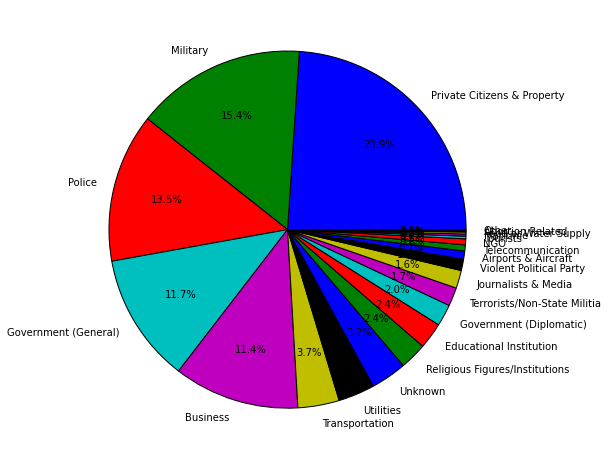

In [128]:
# Most targetted attacks 
plt.figure(figsize=(10,8))
plt.pie(df1['targtype1_txt'].value_counts().values, labels=df1['targtype1_txt'].value_counts().index,pctdistance=0.7, rotatelabels=False, labeldistance=1.1, autopct='%1.1f%%')
plt.show()

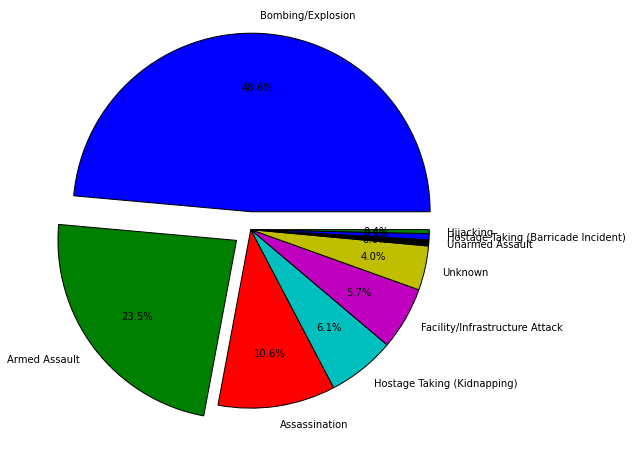

In [165]:
# Highest Attack types
plt.figure(figsize=(10,8))
plt.pie(df1['attacktype1_txt'].value_counts().values, labels=df1['attacktype1_txt'].value_counts().index,pctdistance=0.7, rotatelabels=False, labeldistance=1.1,explode=[0.1,0.1,0,0,0,0,0,0,0], autopct='%1.1f%%')
plt.show()

<AxesSubplot:>

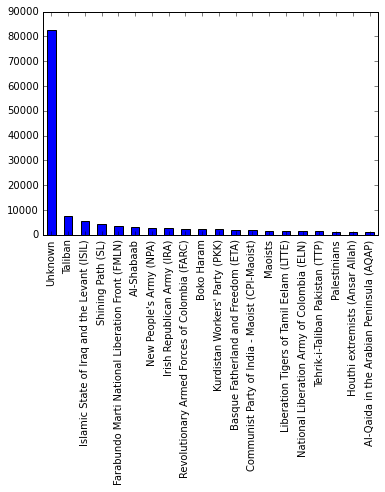

In [132]:

# Groups involved

df1['gname'].value_counts().head(20).plot(kind='bar')

#### Bivariate Analysis

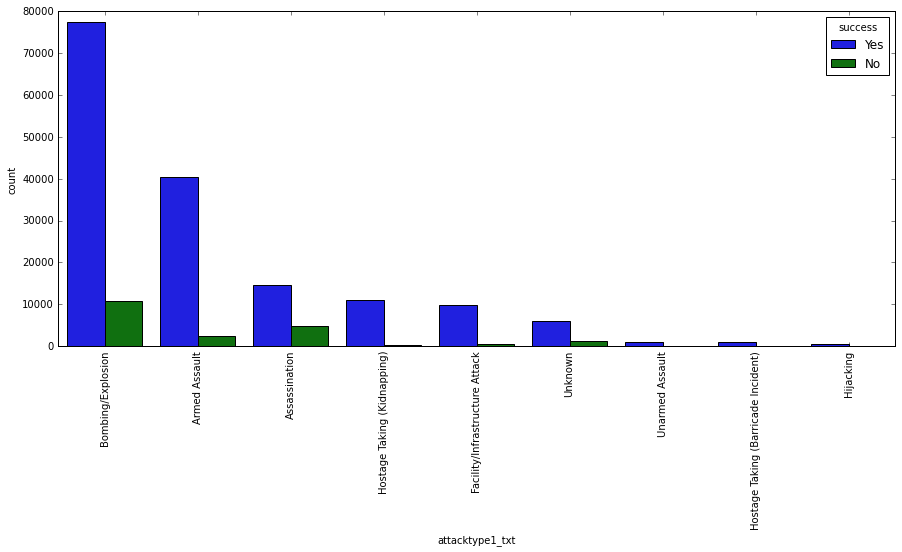

In [142]:
# Analying success failure of various attack types
plt.figure(figsize = (15,6))
sns.countplot(df1['attacktype1_txt'], hue = df1['success'],order = df1['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

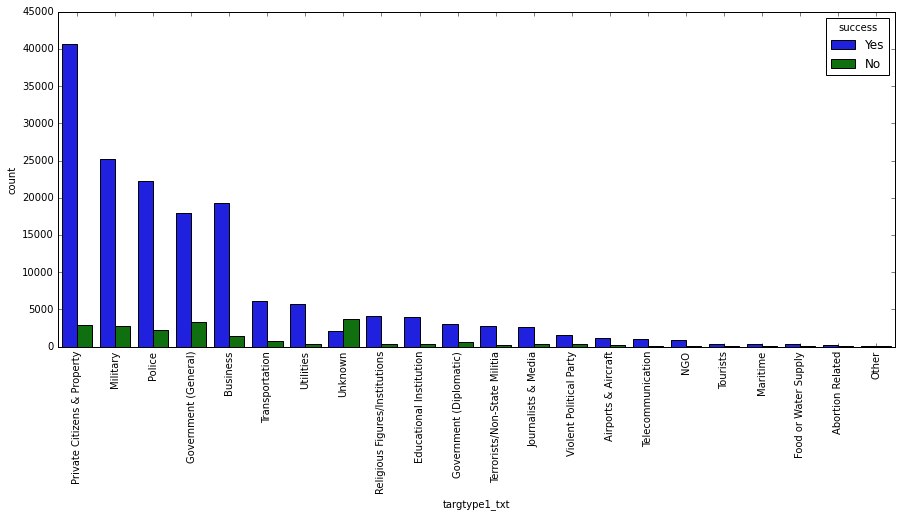

In [140]:
# Analying success failure of various target types
plt.figure(figsize = (15,6))
sns.countplot(df1['targtype1_txt'], hue = df1['success'], order = df1['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [143]:
df1.head(3)

iyear  imonth         country_txt                   region_txt  \
0 1970-01-01       7  Dominican Republic  Central America & Caribbean   
1 1970-01-01       0              Mexico                North America   
2 1970-01-01       1         Philippines               Southeast Asia   

            city crit1 success suicide              attacktype1_txt  \
0  Santo Domingo   Yes     Yes      No                Assassination   
1    Mexico city   Yes     Yes      No  Hostage Taking (Kidnapping)   
2        Unknown   Yes     Yes      No                Assassination   

                 targtype1_txt  \
0  Private Citizens & Property   
1      Government (Diplomatic)   
2          Journalists & Media   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   

                                gname                        corp1  \
0                              MANO-D                      Unknown   
1  23rd of September Communist League  Belgian Ambassador Daughter   
2                             Unknown             Voice of America   

                   target1 weaptype1_txt        weapsubtype1_txt  nkill  \
0             Julio Guzman       Unknown  Unknown Explosive Type    1.0   
1  Nadine Chaval, daughter       Unknown  Unknown Explosive Type    0.0   
2                 Employee       Unknown  Unknown Explosive Type    1.0   

   nwound ransom dbsource  
0     0.0     No     PGIS  
1     0.0    Yes     PGIS  
2     0.0     No     PGIS

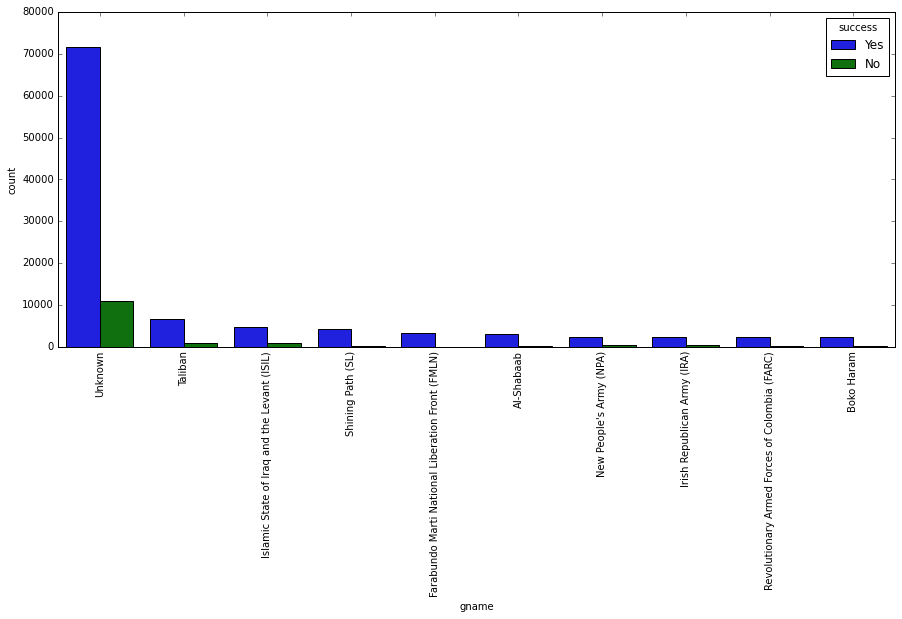

In [147]:
# Analying success failure of various groups
plt.figure(figsize = (15,6))
sns.countplot(df1['gname'], hue = df1['success'], order = df1['gname'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [154]:
# Crosstab table to view groups involved in various targets attack

In [153]:
pd.crosstab(df1['targtype1_txt'],df1['gname'] )

gname                           1 May  14 K Triad  14 March Coalition  \
targtype1_txt                                                           
Abortion Related                    0           0                   0   
Airports & Aircraft                 0           0                   0   
Business                            5           1                   0   
Educational Institution             0           0                   0   
Food or Water Supply                0           0                   0   
Government (Diplomatic)             2           0                   0   
Government (General)                2           0                   0   
Journalists & Media                 0           0                   0   
Maritime                            0           0                   0   
Military                            0           0                   0   
NGO                                 0           0                   0   
Other                               0           0                   0   
Police                              1           0                   0   
Private Citizens & Property         0           3                   0   
Religious Figures/Institutions      0           0                   0   
Telecommunication                   0           0                   0   
Terrorists/Non-State Militia        0           0                   1   
Tourists                            0           0                   0   
Transportation                      0           0                   0   
Unknown                             0           0                   0   
Utilities                           0           0                   0   
Violent Political Party             0           0                   0   

gname                           14th of December Command  \
targtype1_txt                                              
Abortion Related                                       0   
Airports & Aircraft                                    0   
Business                                               1   
Educational Institution                                0   
Food or Water Supply                                   0   
Government (Diplomatic)                                0   
Government (General)                                   0   
Journalists & Media                                    0   
Maritime                                               0   
Military                                               0   
NGO                                                    0   
Other                                                  0   
Police                                                 0   
Private Citizens & Property                            0   
Religious Figures/Institutions                         2   
Telecommunication                                      0   
Terrorists/Non-State Militia                           0   
Tourists                                               0   
Transportation                                         0   
Unknown                                                0   
Utilities                                              0   
Violent Political Party                                0   

gname                           15th of September Liberation Legion  \
targtype1_txt                                                         
Abortion Related                                                  0   
Airports & Aircraft                                               0   
Business                                                          0   
Educational Institution                                           0   
Food or Water Supply                                              0   
Government (Diplomatic)                                           0   
Government (General)                                              0   
Journalists & Media                                               1   
Maritime                                                          0   
Military                 

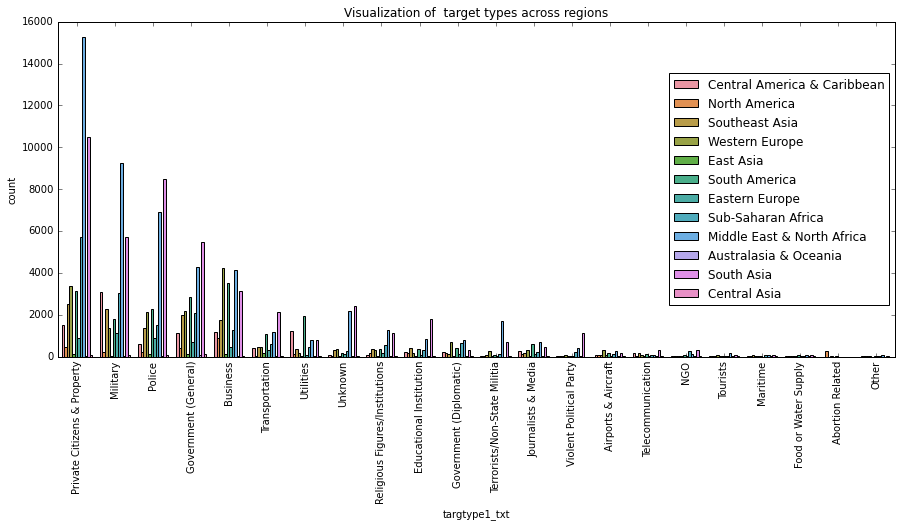

In [184]:
#Visualization of  target types across regions

plt.figure(figsize = (15,6))
sns.countplot(df1['targtype1_txt'], hue = df1['region_txt'], order = df1['targtype1_txt'].value_counts().index).set(title ='Visualization of  target types across regions')
plt.xticks(rotation=90)
plt.legend(loc='right')
plt.show()

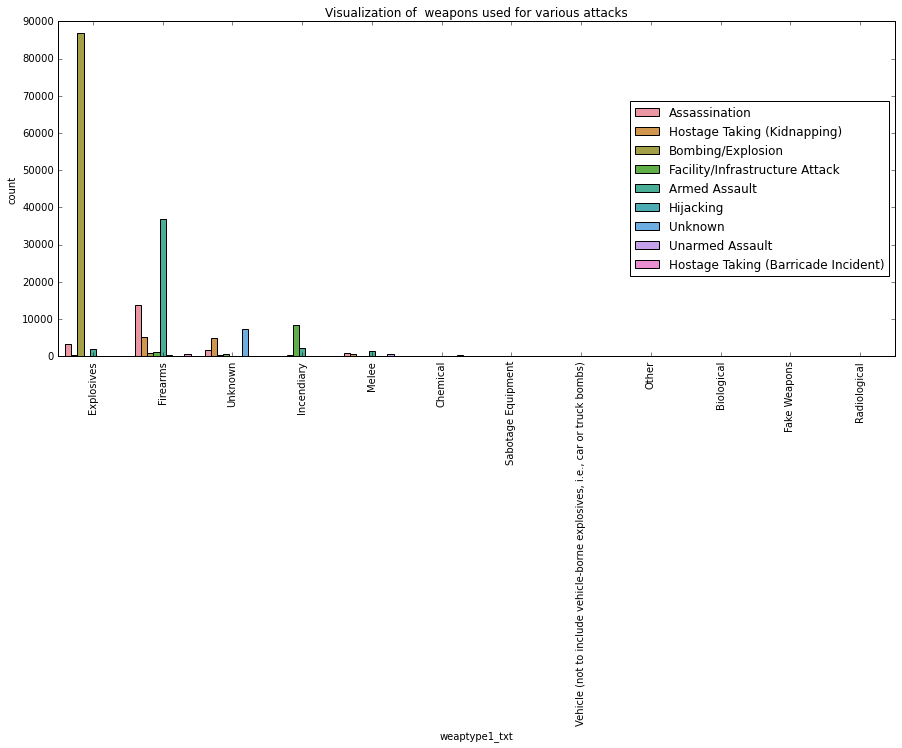

In [178]:
#Visualization of  weapons used for various attacks
plt.figure(figsize = (15,6))
sns.countplot(df1['weaptype1_txt'], hue = df1['attacktype1_txt'], order = df1['weaptype1_txt'].value_counts().index).set(title ='Visualization of  weapons used for various attacks')
plt.xticks(rotation=90)
plt.legend(loc='right')
plt.show()

In [185]:
df1.head(3)

iyear  imonth         country_txt                   region_txt  \
0 1970-01-01       7  Dominican Republic  Central America & Caribbean   
1 1970-01-01       0              Mexico                North America   
2 1970-01-01       1         Philippines               Southeast Asia   

            city crit1 success suicide              attacktype1_txt  \
0  Santo Domingo   Yes     Yes      No                Assassination   
1    Mexico city   Yes     Yes      No  Hostage Taking (Kidnapping)   
2        Unknown   Yes     Yes      No                Assassination   

                 targtype1_txt  \
0  Private Citizens & Property   
1      Government (Diplomatic)   
2          Journalists & Media   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   

                                gname                        corp1  \
0                              MANO-D                      Unknown   
1  23rd of September Communist League  Belgian Ambassador Daughter   
2                             Unknown             Voice of America   

                   target1 weaptype1_txt        weapsubtype1_txt  nkill  \
0             Julio Guzman       Unknown  Unknown Explosive Type    1.0   
1  Nadine Chaval, daughter       Unknown  Unknown Explosive Type    0.0   
2                 Employee       Unknown  Unknown Explosive Type    1.0   

   nwound ransom dbsource  
0     0.0     No     PGIS  
1     0.0    Yes     PGIS  
2     0.0     No     PGIS

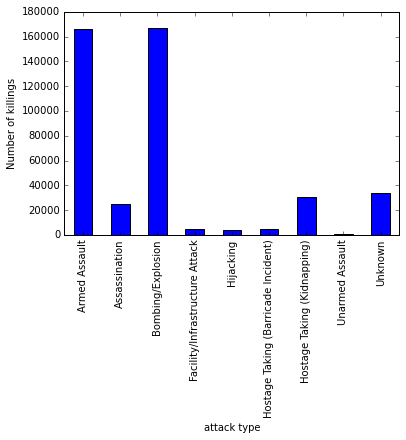

In [194]:
df1.groupby('attacktype1_txt')['nkill'].sum().plot(kind ='bar')
plt.xticks(rotation = 90)
plt.xlabel('attack type')
plt.ylabel('Number of killings')
plt.show()

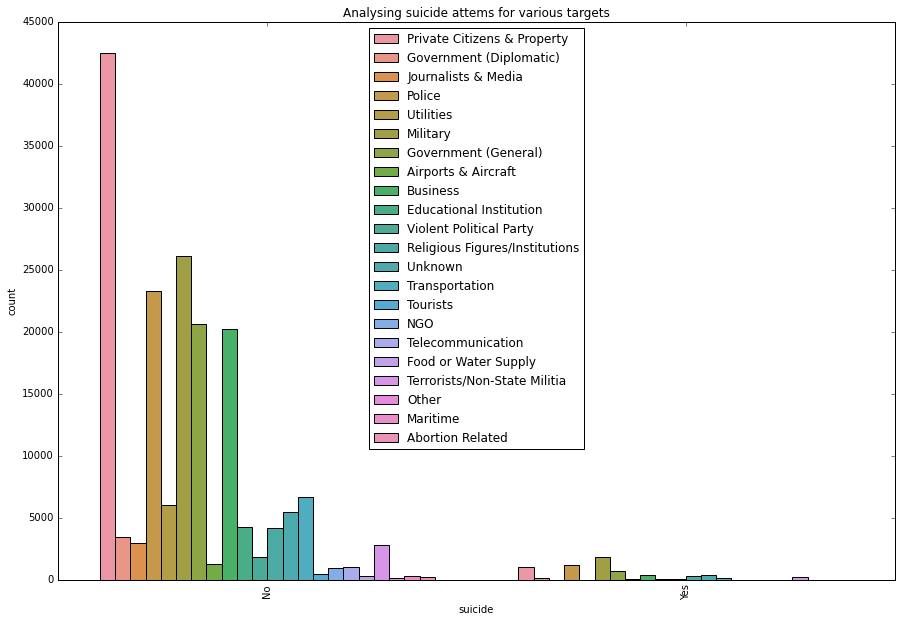

In [204]:
# Analysing suicide attems for various targets 
plt.figure(figsize = (15,10))
sns.countplot(df1['suicide'], hue = df1['targtype1_txt']).set(title = 'Analysing suicide attems for various targets')
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.show()

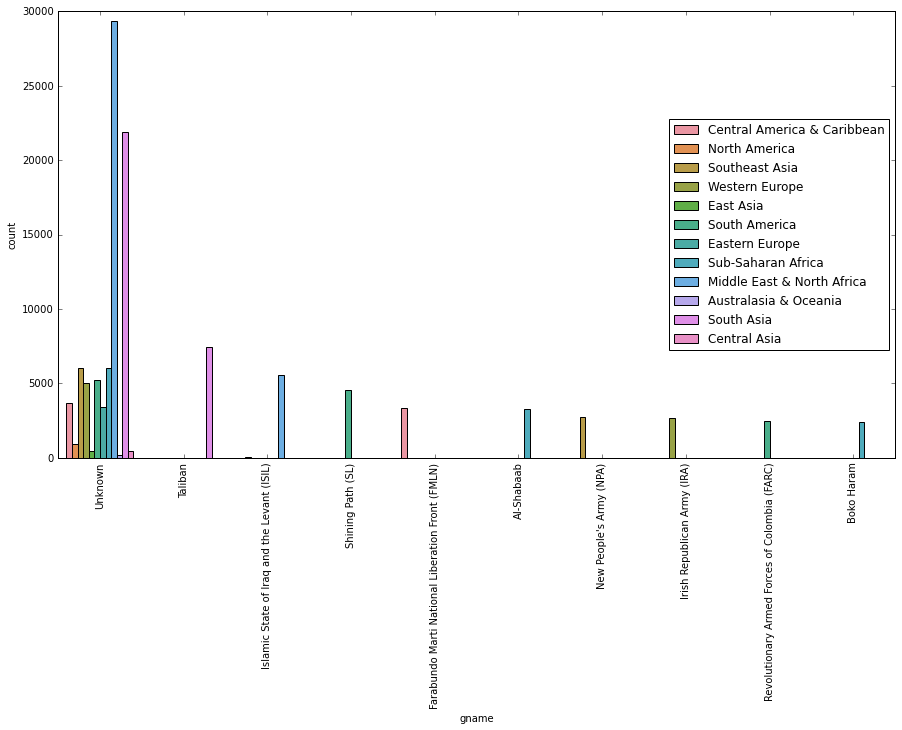

In [200]:
# Analysing terrorist groups involved in various regions
plt.figure(figsize = (15,8))
sns.countplot(df1['gname'], hue = df1['region_txt'], order = df1['gname'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.legend(loc = 'right')
plt.show()

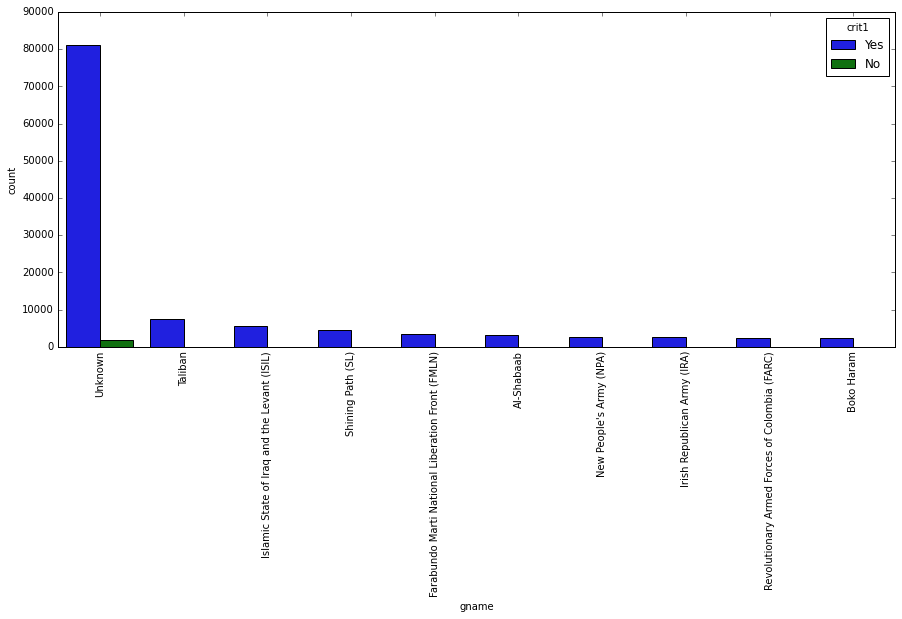

In [207]:
# Analying criticality of attacks done by groups
plt.figure(figsize = (15,6))
sns.countplot(df1['gname'], hue = df1['crit1'],order = df1['gname'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [206]:
df1['dbsource'].unique()

array(['PGIS', 'Hewitt Project', 'Hijacking DB', 'CBRN Global Chronology',
       'CAIN', 'HSI', 'Disorders and Terrorism Chronology',
       'UMD Miscellaneous', 'State Department 1997 Document',
       'UMD Encyclopedia of World Terrorism 2012', 'Hyland',
       'Armenian Website', 'UMD Sri Lanka 2011', 'UMD South Africa',
       'Anti-Abortion Project 2010', 'UMD Assassinations Project',
       'Eco Project 2010', 'UMD Algeria 2010-2012', 'CETIS',
       'Leuprecht Canadian Data', 'UMD Schmid 2012',
       'UMD Black Widows 2011', 'Sageman', 'UMD JTMM Nepal 2012', 'ISVG',
       'START Primary Collection'], dtype=object)

### Insights from EDA

#### 1. 75% of the individual attacks have killed not more than 2 person. However maximum people killed in a single attack was 1570. This attack was at Irag during 2014 done by ISIL

#### 2. The most affected countries and hot zone for terrorism are Irag, Pakistan, Afghanistan, India and Colombia contribution around 38% of the total terror attacks

#### 3. Most affected regions are thus Middle East&North Africa, South Asia and South America contributing around 60% of total attacks

#### 4. Most used weapons are Explosives and Firearms

#### 5. Most targetted attacks were done on Private Citizens and Property followed by Millitary and Police officials. This indicates that there are security issues and lapses on civil areas which needs to be investigated

#### 6. Highet attack types are through Bombing/Explosion and Armed Assault

#### 7. Top groups responsible for the attacks are Taliban and ISIL. There is a large unknown group who are carrying out most of the attack

#### 8. It is observed that attacks done by Bombing and Armed Assault are most successful

#### 9. Most of the successful attacks were executed to Private Citizens, Military and Police

#### 10. The regions where most of the attacks done on Private Citizens and Military are Middle East & North Africa followed by South Asia

#### 11. Most of the Bombing attacks were done by Explosive weapons. And most of the Armed Assault attacks were done by  Firearms

#### 12. Maximum people killed in Bombing and Armed Assault attacks

#### 13. Suicide attacks were mostly used for attacking on Military targets

#### 14. Group -  Taliban is active in South Asia and the Group - ISIL is active in Middle East & North Africa

#### 15. Most critical attacks were done by Unknown groups followed by Taliban and ISIL